In [1]:
import os
from satpy import Scene, DatasetID
import glob
from satpy.multiscene import MultiScene
from satpy.writers import get_enhanced_image

import matplotlib.pyplot as plt
from matplotlib import patheffects

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from datetime import datetime
from siphon.catalog import TDSCatalog

In [ ]:
image_date = datetime.utcnow().date()
region = 'CONUS'
channel = 1

# We want to match something like:
# https://thredds-test.unidata.ucar.edu/thredds/catalog/satellite/goes16/GOES16/Mesoscale-1/Channel08/20181113/catalog.html

# Construct the data_url string
data_url_1 = ('https://thredds.ucar.edu/thredds/catalog/satellite/goes/east/products/'
            f'CloudAndMoistureImagery/{region}/Channel{channel:02d}/'
            f'{image_date:%Y%m%d}/catalog.xml')

# Print out your URL and verify it works!
print(data_url_1)

channel = 2

# We want to match something like:
# https://thredds-test.unidata.ucar.edu/thredds/catalog/satellite/goes16/GOES16/Mesoscale-1/Channel08/20181113/catalog.html

# Construct the data_url string
data_url_2 = ('https://thredds.ucar.edu/thredds/catalog/satellite/goes/east/products/'
            f'CloudAndMoistureImagery/{region}/Channel{channel:02d}/'
            f'{image_date:%Y%m%d}/catalog.xml')

# Print out your URL and verify it works!
print(data_url_2)

channel = 2

# We want to match something like:
# https://thredds-test.unidata.ucar.edu/thredds/catalog/satellite/goes16/GOES16/Mesoscale-1/Channel08/20181113/catalog.html

# Construct the data_url string
data_url_3 = ('https://thredds.ucar.edu/thredds/catalog/satellite/goes/east/products/'
            f'CloudAndMoistureImagery/{region}/Channel{channel:02d}/'
            f'{image_date:%Y%m%d}/catalog.xml')

# Print out your URL and verify it works!
print(data_url_3)

In [ ]:
cat1 = TDSCatalog(data_url_1)
dataset1 = cat1.datasets[1]

cat2 = TDSCatalog(data_url_2)
dataset2 = cat1.datasets[1]

cat3 = TDSCatalog(data_url_3)
dataset3 = cat3.datasets[1]

In [ ]:
filenames = [dataset1,dataset2,dataset3]
filenames

In [ ]:
ds1 = dataset1.remote_access(use_xarray=True)
ds2 = dataset2.remote_access(use_xarray=True)
ds3 = dataset3.remote_access(use_xarray=True)

In [ ]:
filenames = [ds1,ds2,ds3]
filenames

In [ ]:
from satpy import available_readers
available_readers()

In [49]:
def get_current_julian(Year,Month,Day,now=False):
    # Set the date you want to convert
    dt = datetime(Year,Month,Day)
    if now == True:
        dt = datetime.utcnow()

    # Start of year for reference
    d0 = datetime(Year, 1, 1)

    # Find the difference and add one to get the day number of the calander year
    delta = dt - d0
    Julian_Day = delta.days+1
    if Julian_Day < 100:
        Julian_Day = "0"+str(Julian_Day)
        if int(Julian_Day) < 10:
            Julian_Day = "0"+str(Julian_Day)

    Year = str('{0:%Y}'.format(dt))
    Month = str('{0:%m}'.format(dt))
    Day = str('{0:%d}'.format(dt))
    Hour = str('{0:%H}'.format(dt))
    Minute = str('{0:%m}'.format(dt))

    #'{0:%Y}'.format(dt)+"-"+'{0:%m}'.format(dt)+"-"+'{0:%d}'.format(dt)+"-"+'{0:%H}'.format(dt)
    print("date: ",Year+"-"+Month+"-"+Day)

    # Julian day (Day)
    print("Julian number: ",Julian_Day)
    return Year,Month,Day,Julian_Day

In [50]:
Year,Month,Day,Julian_Day = get_current_julian(2020,1,10,now=True)
Year,Month,Day,Julian_Day

date:  2020-05-13
Julian number:  134


('2020', '05', '13', 134)

In [86]:
GOES_sample_path = f"/Users/chowdahead/Downloads/WX_Data/GOES_Data/True_Color/"
GOES_sample_path

'/Users/chowdahead/Downloads/WX_Data/GOES_Data/True_Color/'

In [87]:
os.chdir(GOES_sample_path)

In [88]:
pwd

'/Users/chowdahead/Downloads/WX_Data/GOES_Data/True_Color'

In [ ]:
ls

In [94]:
Hour = "18"
minute = "01"

In [ ]:
! rclone --include "OR_ABI-L1b-RadC-M6C01*s{Year}{Julian_Day}{Hour}{minute}*.nc" ls Public-AWS:noaa-goes16/ABI-L1b-RadC/{Year}/{Julian_Day}/{Hour}/

In [95]:
%%time
! rclone --include "OR_ABI-L1b-RadC-M6C01*s{Year}{Julian_Day}{Hour}{minute}*.nc" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{Year}/{Julian_Day}/{Hour}/ {GOES_sample_path}
! rclone --include "OR_ABI-L1b-RadC-M6C02*s{Year}{Julian_Day}{Hour}{minute}*.nc" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{Year}/{Julian_Day}/{Hour}/ {GOES_sample_path}
! rclone --include "OR_ABI-L1b-RadC-M6C03*s{Year}{Julian_Day}{Hour}{minute}*.nc" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{Year}/{Julian_Day}/{Hour}/ {GOES_sample_path}

CPU times: user 865 ms, sys: 306 ms, total: 1.17 s
Wall time: 39.9 s


In [96]:
%%time
! rclone --include "OR_ABI-L1b-RadC-M6C07*s{Year}{Julian_Day}{Hour}{minute}*.nc" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{Year}/{Julian_Day}/{Hour}/ {GOES_sample_path}
! rclone --include "OR_ABI-L1b-RadC-M6C14*s{Year}{Julian_Day}{Hour}{minute}*.nc" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{Year}/{Julian_Day}/{Hour}/ {GOES_sample_path}
! rclone --include "OR_ABI-L1b-RadC-M6C15*s{Year}{Julian_Day}{Hour}{minute}*.nc" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{Year}/{Julian_Day}/{Hour}/ {GOES_sample_path}

CPU times: user 138 ms, sys: 67.5 ms, total: 206 ms
Wall time: 6.4 s


In [97]:
%%time
! rclone --include "OR_ABI-L1b-RadC-M6C08*s{Year}{Julian_Day}{Hour}{minute}*.nc" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{Year}/{Julian_Day}/{Hour}/ {GOES_sample_path}
! rclone --include "OR_ABI-L1b-RadC-M6C10*s{Year}{Julian_Day}{Hour}{minute}*.nc" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{Year}/{Julian_Day}/{Hour}/ {GOES_sample_path}
! rclone --include "OR_ABI-L1b-RadC-M6C12*s{Year}{Julian_Day}{Hour}{minute}*.nc" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{Year}/{Julian_Day}/{Hour}/ {GOES_sample_path}
! rclone --include "OR_ABI-L1b-RadC-M6C13*s{Year}{Julian_Day}{Hour}{minute}*.nc" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{Year}/{Julian_Day}/{Hour}/ {GOES_sample_path}

CPU times: user 191 ms, sys: 90.4 ms, total: 282 ms
Wall time: 9.07 s


In [98]:
! rclone --include "OR_ABI-L1b-RadC-M6C11*s{Year}{Julian_Day}{Hour}{minute}*.nc" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{Year}/{Julian_Day}/{Hour}/ {GOES_sample_path}

In [99]:
! rclone --include "OR_ABI-L1b-RadC-M6C05*s{Year}{Julian_Day}{Hour}{minute}*.nc" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{Year}/{Julian_Day}/{Hour}/ {GOES_sample_path}

In [101]:
! rclone --include "OR_ABI-L1b-RadC-M6C16*s{Year}{Julian_Day}{Hour}{minute}*.nc" copy Public-AWS:noaa-goes16/ABI-L1b-RadC/{Year}/{Julian_Day}/{Hour}/ {GOES_sample_path}

In [ ]:
all_filenames = [glob.glob(fn.replace('C01', 'C0[123]*')[:len(GOES_sample_path) + 50] + '*.nc') for fn in sorted(glob.glob(os.path.join(GOES_sample_path, 'OR*-Rad*C01*.nc')))]
print(all_filenames)
scenes = [Scene(reader='abi_l1b', filenames=filenames) for filenames in all_filenames]
print("Number of Scenes: ", len(scenes))

mscn = MultiScene(scenes)
mscn.load(['true_color'])


#mscn.show('true_color')

new_mscn = mscn.resample(resampler='native')
new_mscn.save_animation(GOES_sample_path+'/{name}_{start_time:%Y%m%d_%H%M%S}.mp4', fps=5)


In [38]:
pwd

'/Users/chowdahead/Downloads/WX_Data/GOES_Data'

In [102]:
filenames = glob.glob("*.nc")
filenames

['OR_ABI-L1b-RadC-M6C01_G16_s20201341801116_e20201341803489_c20201341803533.nc',
 'OR_ABI-L1b-RadC-M6C02_G16_s20201341801116_e20201341803489_c20201341803525.nc',
 'OR_ABI-L1b-RadC-M6C03_G16_s20201341801116_e20201341803489_c20201341803540.nc',
 'OR_ABI-L1b-RadC-M6C05_G16_s20201341801116_e20201341803489_c20201341804035.nc',
 'OR_ABI-L1b-RadC-M6C07_G16_s20201341801116_e20201341803500_c20201341803564.nc',
 'OR_ABI-L1b-RadC-M6C08_G16_s20201341801116_e20201341803489_c20201341803583.nc',
 'OR_ABI-L1b-RadC-M6C10_G16_s20201341801116_e20201341803500_c20201341803570.nc',
 'OR_ABI-L1b-RadC-M6C11_G16_s20201341801116_e20201341803489_c20201341803577.nc',
 'OR_ABI-L1b-RadC-M6C12_G16_s20201341801116_e20201341803495_c20201341803590.nc',
 'OR_ABI-L1b-RadC-M6C13_G16_s20201341801116_e20201341803500_c20201341804020.nc',
 'OR_ABI-L1b-RadC-M6C14_G16_s20201341801116_e20201341803489_c20201341804027.nc',
 'OR_ABI-L1b-RadC-M6C15_G16_s20201341801116_e20201341803495_c20201341804014.nc',
 'OR_ABI-L1b-RadC-M6C16_G16_

In [78]:
scn = Scene(reader='abi_l1b', filenames=filenames)
print(scn.all_composite_names())
scn.load([product])

    
#new_scn = scn.resample(scn.min_area(), resampler='native')
scn.show(product)

['airmass', 'ash', 'cloud_drop_effective_radius', 'cloud_optical_thickness', 'cloud_top_height', 'cloud_top_phase', 'cloud_top_pressure', 'cloud_top_temperature', 'cloud_water_path', 'cloudmask', 'cloudmask_extended', 'cloudtop', 'cloudtype', 'convection', 'day_microphysics', 'dust', 'fog', 'green', 'green_crefl', 'green_raw', 'green_snow', 'ice_water_path', 'ir108_3d', 'ir_cloud_day', 'liquid_water_path', 'natural_color', 'natural_color_raw', 'natural_color_sun', 'natural_with_night_fog', 'night_fog', 'night_microphysics', 'overview', 'overview_raw', 'overview_sun', 'precipitation_probability', 'snow', 'true_color', 'true_color_crefl', 'true_color_raw']


KeyError: "No dataset matching 'DatasetID(name='convection', wavelength=None, resolution=None, polarization=None, calibration=None, level=None, modifiers=None)' found"

In [90]:
def GOES_RGB(product,filenames,extent=None,projection=None):
    
    scn = Scene(reader='abi_l1b', filenames=filenames)
    print(scn.all_composite_names())
    scn.load([product])

    
    new_scn = scn.resample(scn.min_area(), resampler='native')

    
    #var = get_enhanced_image(scn[product]).data
    var = get_enhanced_image(new_scn[product]).data
    # Get true color data to use later and reorder the dimensions so matplotlib can use the image
    # Sadly, this operation is not lazy (bad performance) in xarray at the time of writing
    var = var.transpose('y', 'x', 'bands')
    
    fig = plt.figure(figsize=(20, 10), dpi=200)
    abi_crs = var.attrs['area'].to_cartopy_crs()
    if projection == None:
        proj=abi_crs
    if projection == "lambert":
        proj = ccrs.LambertConformal()
    if projection == "plate":
        proj = ccrs.PlateCarree()
        
    
    ax = fig.add_subplot(1, 1, 1, projection=proj)

    ax.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='w')
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='w')
    if extent !=None:
        ax.set_extent(extent, crs=ccrs.PlateCarree())
    else:
        ax.set_extent([-130,-70,20,55], crs=ccrs.PlateCarree())

    ax.imshow(var.data, extent=(var.x[0], var.x[-1], var.y[-1], var.y[0]), origin='upper',
             transform=abi_crs)
    
    #title = scn[product].orbital_slot
    #title2 = f"{scn[product].standard_name.capitalize()}-{scn[product].mode}"
    #title_time = "{0:%d-%B-%Y %H%MZ}".format(scn[product].start_time)
    
    title = new_scn[product].orbital_slot
    title2 = new_scn[product].standard_name.capitalize()+"-"+new_scn[product].mode
    title_time = "{0:%d-%B-%Y %H%MZ}".format(new_scn[product].start_time)
    
    text_time = ax.text(.995, 0.01, 
            title_time,
            horizontalalignment='right', transform=ax.transAxes,
            color='white', fontsize=20, weight='bold')

    text_time2 = ax.text(0.005, 0.01, 
            title+"\n"+title2,
            horizontalalignment='left', transform=ax.transAxes,
            color='white', fontsize=20, weight='bold')

    outline_effect = [patheffects.withStroke(linewidth=5, foreground='black')]
    text_time.set_path_effects(outline_effect)
    text_time2.set_path_effects(outline_effect)

    plt.savefig(f"/Users/chowdahead/Desktop/GOES_rgb_{product}.png",bbox_inches="tight")

In [91]:
filenames

['OR_ABI-L1b-RadC-M6C01_G16_s20201281801110_e20201281803483_c20201281803543.nc',
 'OR_ABI-L1b-RadC-M6C02_G16_s20201281801110_e20201281803483_c20201281803513.nc',
 'OR_ABI-L1b-RadC-M6C03_G16_s20201281801110_e20201281803483_c20201281803535.nc']

['airmass', 'ash', 'cloud_drop_effective_radius', 'cloud_optical_thickness', 'cloud_top_height', 'cloud_top_phase', 'cloud_top_pressure', 'cloud_top_temperature', 'cloud_water_path', 'cloudmask', 'cloudmask_extended', 'cloudtop', 'cloudtype', 'convection', 'day_microphysics', 'dust', 'fog', 'green', 'green_crefl', 'green_raw', 'green_snow', 'ice_water_path', 'ir108_3d', 'ir_cloud_day', 'liquid_water_path', 'natural_color', 'natural_color_raw', 'natural_color_sun', 'natural_with_night_fog', 'night_fog', 'night_microphysics', 'overview', 'overview_raw', 'overview_sun', 'precipitation_probability', 'snow', 'true_color', 'true_color_crefl', 'true_color_raw']


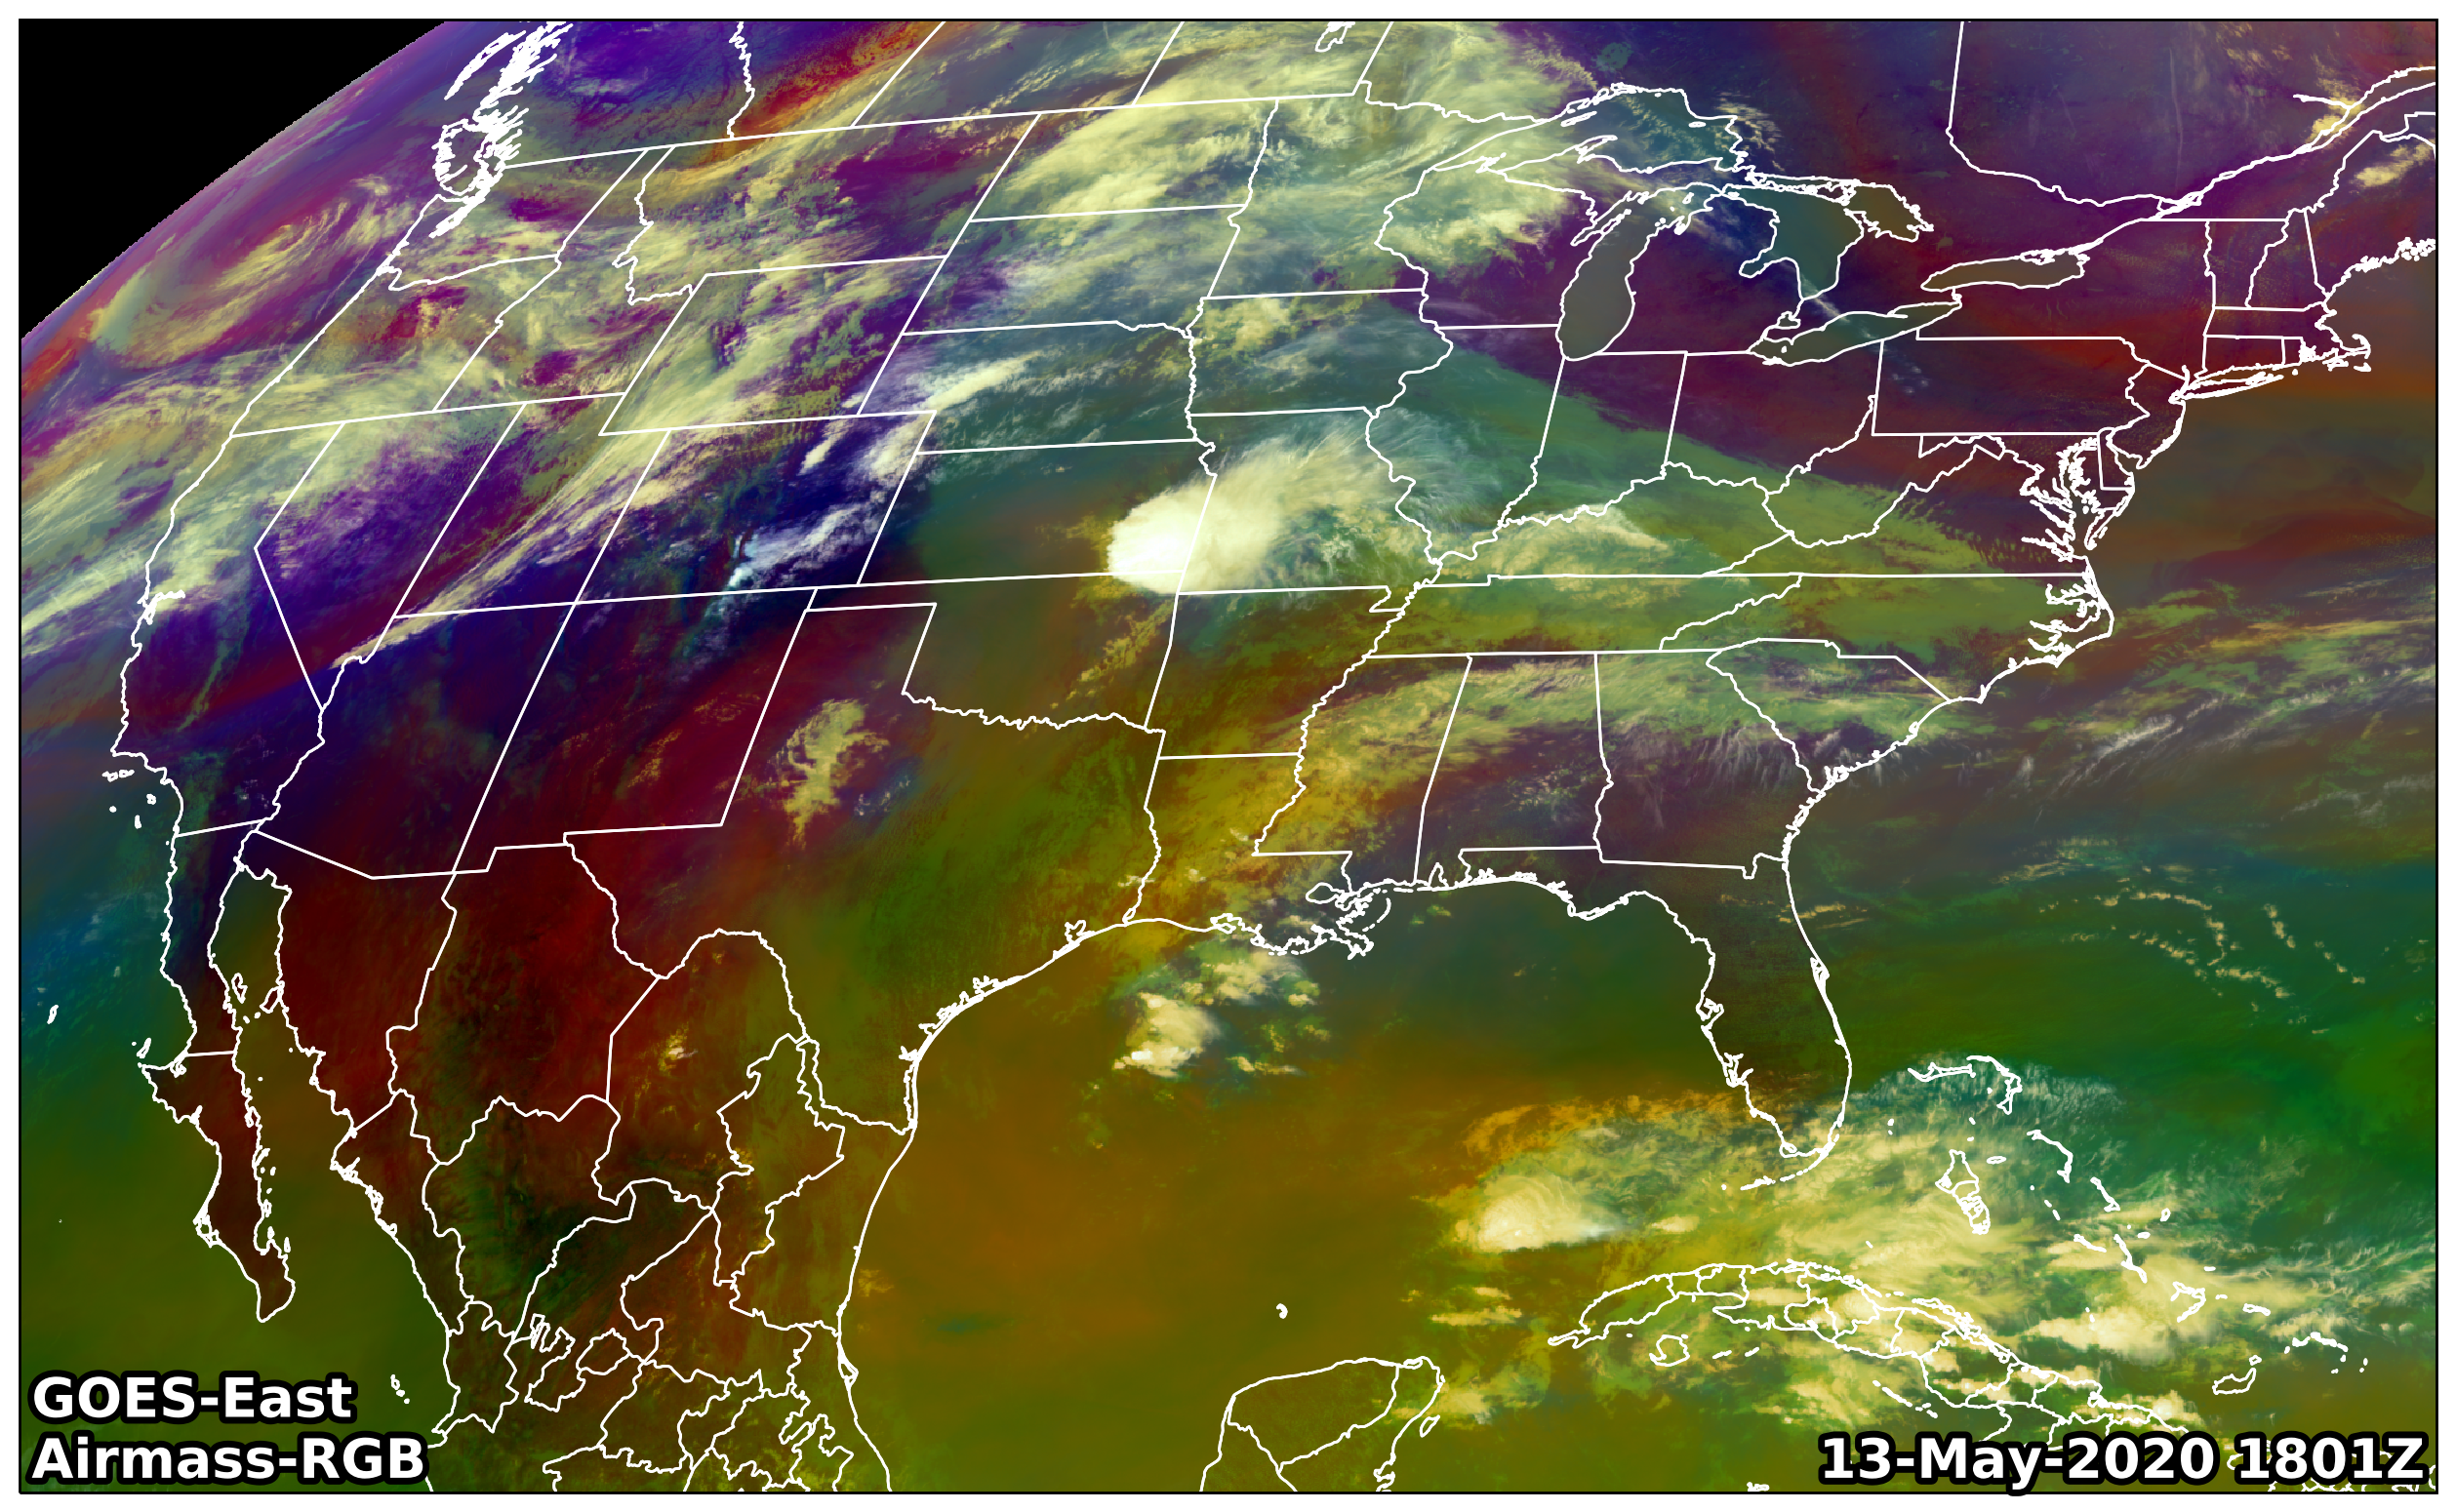

In [104]:
GOES_RGB("airmass",filenames,extent=[-120,-70,20,55])

In [85]:
import dask